In [16]:
from keras.applications.nasnet import NASNetMobile
from keras.applications.vgg16 import VGG16
from keras import Model
from keras.layers import Conv2D,MaxPool2D,Input
from keras.losses import binary_crossentropy
from keras.callbacks import ModelCheckpoint
from keras import backend as K
import tensorflow as tf
import numpy as np
import preprocessing
import cv2
import matplotlib.pyplot as plt

In [2]:
input_shape = (224,224,3)

In [33]:
x = K.variable([1,2,3,4,5])
a = K.int_shape(x)
print(a)

(5,)


In [44]:
x = np.random.randint(100,size=(5,4))
print(x)
print(x.reshape((-1,10)))

[[16 49 23 37]
 [28 70 19 43]
 [11 86 15 45]
 [85 99 45 26]
 [95 91 18 99]]
[[16 49 23 37 28 70 19 43 11 86]
 [15 45 85 99 45 26 95 91 18 99]]


In [3]:
images, cls, rgs = preprocessing.load_datasets(2500,0.7)

0 % ,loading train2014/COCO_train2014_000000057870.jpg
0 % ,loading train2014/COCO_train2014_000000384029.jpg
0 % ,loading train2014/COCO_train2014_000000222016.jpg
0 % ,loading train2014/COCO_train2014_000000520950.jpg
0 % ,loading train2014/COCO_train2014_000000069675.jpg
0 % ,loading train2014/COCO_train2014_000000547471.jpg
0 % ,loading train2014/COCO_train2014_000000122688.jpg
0 % ,loading train2014/COCO_train2014_000000392136.jpg
0 % ,loading train2014/COCO_train2014_000000398494.jpg
0 % ,loading train2014/COCO_train2014_000000090570.jpg
0 % ,loading train2014/COCO_train2014_000000504616.jpg
0 % ,loading train2014/COCO_train2014_000000161919.jpg
0 % ,loading train2014/COCO_train2014_000000457732.jpg
0 % ,loading train2014/COCO_train2014_000000044404.jpg
0 % ,loading train2014/COCO_train2014_000000004428.jpg
0 % ,loading train2014/COCO_train2014_000000170558.jpg
0 % ,loading train2014/COCO_train2014_000000405613.jpg
0 % ,loading train2014/COCO_train2014_000000283524.jpg
0 % ,loadi

6 % ,loading train2014/COCO_train2014_000000345781.jpg
6 % ,loading train2014/COCO_train2014_000000371029.jpg
6 % ,loading train2014/COCO_train2014_000000145179.jpg
6 % ,loading train2014/COCO_train2014_000000170850.jpg
6 % ,loading train2014/COCO_train2014_000000077375.jpg
6 % ,loading train2014/COCO_train2014_000000525589.jpg
6 % ,loading train2014/COCO_train2014_000000560628.jpg
6 % ,loading train2014/COCO_train2014_000000212091.jpg
6 % ,loading train2014/COCO_train2014_000000018885.jpg
6 % ,loading train2014/COCO_train2014_000000167603.jpg
6 % ,loading train2014/COCO_train2014_000000225750.jpg
6 % ,loading train2014/COCO_train2014_000000155845.jpg
7 % ,loading train2014/COCO_train2014_000000215481.jpg
7 % ,loading train2014/COCO_train2014_000000136461.jpg
7 % ,loading train2014/COCO_train2014_000000259446.jpg
7 % ,loading train2014/COCO_train2014_000000412198.jpg
7 % ,loading train2014/COCO_train2014_000000277854.jpg
7 % ,loading train2014/COCO_train2014_000000160163.jpg
7 % ,loadi

12 % ,loading train2014/COCO_train2014_000000512845.jpg
13 % ,loading train2014/COCO_train2014_000000219680.jpg
13 % ,loading train2014/COCO_train2014_000000513956.jpg
13 % ,loading train2014/COCO_train2014_000000341844.jpg
13 % ,loading train2014/COCO_train2014_000000105026.jpg
13 % ,loading train2014/COCO_train2014_000000106652.jpg
13 % ,loading train2014/COCO_train2014_000000243792.jpg
13 % ,loading train2014/COCO_train2014_000000496678.jpg
13 % ,loading train2014/COCO_train2014_000000239754.jpg
13 % ,loading train2014/COCO_train2014_000000047087.jpg
13 % ,loading train2014/COCO_train2014_000000520343.jpg
13 % ,loading train2014/COCO_train2014_000000326935.jpg
13 % ,loading train2014/COCO_train2014_000000191120.jpg
13 % ,loading train2014/COCO_train2014_000000349129.jpg
13 % ,loading train2014/COCO_train2014_000000577196.jpg
13 % ,loading train2014/COCO_train2014_000000032044.jpg
13 % ,loading train2014/COCO_train2014_000000140426.jpg
13 % ,loading train2014/COCO_train2014_000000097

19 % ,loading train2014/COCO_train2014_000000552054.jpg
19 % ,loading train2014/COCO_train2014_000000075477.jpg
19 % ,loading train2014/COCO_train2014_000000417693.jpg
19 % ,loading train2014/COCO_train2014_000000562623.jpg
19 % ,loading train2014/COCO_train2014_000000359141.jpg
19 % ,loading train2014/COCO_train2014_000000153667.jpg
19 % ,loading train2014/COCO_train2014_000000098746.jpg
19 % ,loading train2014/COCO_train2014_000000420529.jpg
19 % ,loading train2014/COCO_train2014_000000147788.jpg
19 % ,loading train2014/COCO_train2014_000000283658.jpg
19 % ,loading train2014/COCO_train2014_000000052038.jpg
19 % ,loading train2014/COCO_train2014_000000036736.jpg
19 % ,loading train2014/COCO_train2014_000000260347.jpg
19 % ,loading train2014/COCO_train2014_000000512629.jpg
19 % ,loading train2014/COCO_train2014_000000132538.jpg
20 % ,loading train2014/COCO_train2014_000000530796.jpg
20 % ,loading train2014/COCO_train2014_000000488924.jpg
20 % ,loading train2014/COCO_train2014_000000545

25 % ,loading train2014/COCO_train2014_000000102630.jpg
25 % ,loading train2014/COCO_train2014_000000170193.jpg
25 % ,loading train2014/COCO_train2014_000000204351.jpg
25 % ,loading train2014/COCO_train2014_000000368548.jpg
26 % ,loading train2014/COCO_train2014_000000048707.jpg
26 % ,loading train2014/COCO_train2014_000000063378.jpg
26 % ,loading train2014/COCO_train2014_000000058481.jpg
26 % ,loading train2014/COCO_train2014_000000492642.jpg
26 % ,loading train2014/COCO_train2014_000000475142.jpg
26 % ,loading train2014/COCO_train2014_000000408219.jpg
26 % ,loading train2014/COCO_train2014_000000120159.jpg
26 % ,loading train2014/COCO_train2014_000000248002.jpg
26 % ,loading train2014/COCO_train2014_000000340674.jpg
26 % ,loading train2014/COCO_train2014_000000490385.jpg
26 % ,loading train2014/COCO_train2014_000000439518.jpg
26 % ,loading train2014/COCO_train2014_000000027627.jpg
26 % ,loading train2014/COCO_train2014_000000403463.jpg
26 % ,loading train2014/COCO_train2014_000000077

31 % ,loading train2014/COCO_train2014_000000181628.jpg
31 % ,loading train2014/COCO_train2014_000000365135.jpg
31 % ,loading train2014/COCO_train2014_000000496517.jpg
31 % ,loading train2014/COCO_train2014_000000204463.jpg
32 % ,loading train2014/COCO_train2014_000000406386.jpg
32 % ,loading train2014/COCO_train2014_000000512786.jpg
32 % ,loading train2014/COCO_train2014_000000337819.jpg
32 % ,loading train2014/COCO_train2014_000000229193.jpg
32 % ,loading train2014/COCO_train2014_000000359059.jpg
32 % ,loading train2014/COCO_train2014_000000160940.jpg
32 % ,loading train2014/COCO_train2014_000000508821.jpg
32 % ,loading train2014/COCO_train2014_000000235795.jpg
32 % ,loading train2014/COCO_train2014_000000543534.jpg
32 % ,loading train2014/COCO_train2014_000000579042.jpg
32 % ,loading train2014/COCO_train2014_000000247224.jpg
32 % ,loading train2014/COCO_train2014_000000062613.jpg
32 % ,loading train2014/COCO_train2014_000000312887.jpg
32 % ,loading train2014/COCO_train2014_000000442

37 % ,loading train2014/COCO_train2014_000000396179.jpg
37 % ,loading train2014/COCO_train2014_000000168869.jpg
37 % ,loading train2014/COCO_train2014_000000286569.jpg
37 % ,loading train2014/COCO_train2014_000000150969.jpg
37 % ,loading train2014/COCO_train2014_000000012472.jpg
38 % ,loading train2014/COCO_train2014_000000362367.jpg
38 % ,loading train2014/COCO_train2014_000000262463.jpg
38 % ,loading train2014/COCO_train2014_000000141180.jpg
38 % ,loading train2014/COCO_train2014_000000399456.jpg
38 % ,loading train2014/COCO_train2014_000000546517.jpg
38 % ,loading train2014/COCO_train2014_000000082597.jpg
38 % ,loading train2014/COCO_train2014_000000431788.jpg
38 % ,loading train2014/COCO_train2014_000000199318.jpg
38 % ,loading train2014/COCO_train2014_000000210728.jpg
38 % ,loading train2014/COCO_train2014_000000401821.jpg
38 % ,loading train2014/COCO_train2014_000000566258.jpg
38 % ,loading train2014/COCO_train2014_000000498562.jpg
38 % ,loading train2014/COCO_train2014_000000048

44 % ,loading train2014/COCO_train2014_000000068283.jpg
44 % ,loading train2014/COCO_train2014_000000176622.jpg
44 % ,loading train2014/COCO_train2014_000000034884.jpg
44 % ,loading train2014/COCO_train2014_000000524709.jpg
44 % ,loading train2014/COCO_train2014_000000381275.jpg
44 % ,loading train2014/COCO_train2014_000000551934.jpg
44 % ,loading train2014/COCO_train2014_000000195368.jpg
44 % ,loading train2014/COCO_train2014_000000360269.jpg
44 % ,loading train2014/COCO_train2014_000000249397.jpg
44 % ,loading train2014/COCO_train2014_000000245089.jpg
44 % ,loading train2014/COCO_train2014_000000560412.jpg
44 % ,loading train2014/COCO_train2014_000000156904.jpg
44 % ,loading train2014/COCO_train2014_000000056615.jpg
44 % ,loading train2014/COCO_train2014_000000385687.jpg
44 % ,loading train2014/COCO_train2014_000000334603.jpg
44 % ,loading train2014/COCO_train2014_000000330028.jpg
45 % ,loading train2014/COCO_train2014_000000271106.jpg
45 % ,loading train2014/COCO_train2014_000000418

50 % ,loading train2014/COCO_train2014_000000430251.jpg
50 % ,loading train2014/COCO_train2014_000000466095.jpg
50 % ,loading train2014/COCO_train2014_000000425061.jpg
50 % ,loading train2014/COCO_train2014_000000163387.jpg
50 % ,loading train2014/COCO_train2014_000000319866.jpg
50 % ,loading train2014/COCO_train2014_000000460897.jpg
50 % ,loading train2014/COCO_train2014_000000102834.jpg
50 % ,loading train2014/COCO_train2014_000000519398.jpg
50 % ,loading train2014/COCO_train2014_000000128932.jpg
50 % ,loading train2014/COCO_train2014_000000580152.jpg
50 % ,loading train2014/COCO_train2014_000000321673.jpg
50 % ,loading train2014/COCO_train2014_000000501846.jpg
50 % ,loading train2014/COCO_train2014_000000506429.jpg
50 % ,loading train2014/COCO_train2014_000000376436.jpg
50 % ,loading train2014/COCO_train2014_000000243818.jpg
51 % ,loading train2014/COCO_train2014_000000160014.jpg
51 % ,loading train2014/COCO_train2014_000000241851.jpg
51 % ,loading train2014/COCO_train2014_000000289

56 % ,loading train2014/COCO_train2014_000000072525.jpg
56 % ,loading train2014/COCO_train2014_000000422269.jpg
56 % ,loading train2014/COCO_train2014_000000356007.jpg
56 % ,loading train2014/COCO_train2014_000000412896.jpg
56 % ,loading train2014/COCO_train2014_000000125473.jpg
56 % ,loading train2014/COCO_train2014_000000065943.jpg
56 % ,loading train2014/COCO_train2014_000000444312.jpg
56 % ,loading train2014/COCO_train2014_000000489333.jpg
56 % ,loading train2014/COCO_train2014_000000460996.jpg
56 % ,loading train2014/COCO_train2014_000000372558.jpg
56 % ,loading train2014/COCO_train2014_000000402420.jpg
56 % ,loading train2014/COCO_train2014_000000347380.jpg
56 % ,loading train2014/COCO_train2014_000000368116.jpg
56 % ,loading train2014/COCO_train2014_000000065894.jpg
56 % ,loading train2014/COCO_train2014_000000143936.jpg
56 % ,loading train2014/COCO_train2014_000000170125.jpg
56 % ,loading train2014/COCO_train2014_000000065301.jpg
57 % ,loading train2014/COCO_train2014_000000370

62 % ,loading train2014/COCO_train2014_000000191177.jpg
62 % ,loading train2014/COCO_train2014_000000425807.jpg
62 % ,loading train2014/COCO_train2014_000000398540.jpg
62 % ,loading train2014/COCO_train2014_000000346388.jpg
62 % ,loading train2014/COCO_train2014_000000542988.jpg
62 % ,loading train2014/COCO_train2014_000000556880.jpg
62 % ,loading train2014/COCO_train2014_000000288227.jpg
62 % ,loading train2014/COCO_train2014_000000015249.jpg
62 % ,loading train2014/COCO_train2014_000000312958.jpg
62 % ,loading train2014/COCO_train2014_000000292030.jpg
62 % ,loading train2014/COCO_train2014_000000401759.jpg
62 % ,loading train2014/COCO_train2014_000000147294.jpg
62 % ,loading train2014/COCO_train2014_000000347697.jpg
62 % ,loading train2014/COCO_train2014_000000470957.jpg
63 % ,loading train2014/COCO_train2014_000000568116.jpg
63 % ,loading train2014/COCO_train2014_000000116603.jpg
63 % ,loading train2014/COCO_train2014_000000481407.jpg
63 % ,loading train2014/COCO_train2014_000000434

68 % ,loading train2014/COCO_train2014_000000157133.jpg
68 % ,loading train2014/COCO_train2014_000000051989.jpg
68 % ,loading train2014/COCO_train2014_000000511523.jpg
68 % ,loading train2014/COCO_train2014_000000186526.jpg
68 % ,loading train2014/COCO_train2014_000000569088.jpg
68 % ,loading train2014/COCO_train2014_000000198981.jpg
68 % ,loading train2014/COCO_train2014_000000375325.jpg
68 % ,loading train2014/COCO_train2014_000000176176.jpg
68 % ,loading train2014/COCO_train2014_000000057883.jpg
68 % ,loading train2014/COCO_train2014_000000524196.jpg
68 % ,loading train2014/COCO_train2014_000000231593.jpg
68 % ,loading train2014/COCO_train2014_000000490175.jpg
68 % ,loading train2014/COCO_train2014_000000315768.jpg
68 % ,loading train2014/COCO_train2014_000000435787.jpg
68 % ,loading train2014/COCO_train2014_000000168954.jpg
68 % ,loading train2014/COCO_train2014_000000094026.jpg
69 % ,loading train2014/COCO_train2014_000000093826.jpg
69 % ,loading train2014/COCO_train2014_000000580

74 % ,loading train2014/COCO_train2014_000000480787.jpg
75 % ,loading train2014/COCO_train2014_000000413122.jpg
75 % ,loading train2014/COCO_train2014_000000375806.jpg
75 % ,loading train2014/COCO_train2014_000000386389.jpg
75 % ,loading train2014/COCO_train2014_000000167734.jpg
75 % ,loading train2014/COCO_train2014_000000514506.jpg
75 % ,loading train2014/COCO_train2014_000000221505.jpg
75 % ,loading train2014/COCO_train2014_000000305644.jpg
75 % ,loading train2014/COCO_train2014_000000277003.jpg
75 % ,loading train2014/COCO_train2014_000000415589.jpg
75 % ,loading train2014/COCO_train2014_000000245142.jpg
75 % ,loading train2014/COCO_train2014_000000296201.jpg
75 % ,loading train2014/COCO_train2014_000000292315.jpg
75 % ,loading train2014/COCO_train2014_000000406446.jpg
75 % ,loading train2014/COCO_train2014_000000208124.jpg
75 % ,loading train2014/COCO_train2014_000000536286.jpg
75 % ,loading train2014/COCO_train2014_000000561913.jpg
75 % ,loading train2014/COCO_train2014_000000420

81 % ,loading train2014/COCO_train2014_000000108944.jpg
81 % ,loading train2014/COCO_train2014_000000091926.jpg
81 % ,loading train2014/COCO_train2014_000000085176.jpg
81 % ,loading train2014/COCO_train2014_000000150192.jpg
81 % ,loading train2014/COCO_train2014_000000235953.jpg
81 % ,loading train2014/COCO_train2014_000000267266.jpg
81 % ,loading train2014/COCO_train2014_000000554950.jpg
81 % ,loading train2014/COCO_train2014_000000064733.jpg
81 % ,loading train2014/COCO_train2014_000000428345.jpg
81 % ,loading train2014/COCO_train2014_000000426920.jpg
81 % ,loading train2014/COCO_train2014_000000238200.jpg
81 % ,loading train2014/COCO_train2014_000000433405.jpg
81 % ,loading train2014/COCO_train2014_000000576389.jpg
81 % ,loading train2014/COCO_train2014_000000260134.jpg
81 % ,loading train2014/COCO_train2014_000000431013.jpg
81 % ,loading train2014/COCO_train2014_000000287962.jpg
81 % ,loading train2014/COCO_train2014_000000073427.jpg
81 % ,loading train2014/COCO_train2014_000000293

86 % ,loading train2014/COCO_train2014_000000160380.jpg
87 % ,loading train2014/COCO_train2014_000000018513.jpg
87 % ,loading train2014/COCO_train2014_000000114815.jpg
87 % ,loading train2014/COCO_train2014_000000496210.jpg
87 % ,loading train2014/COCO_train2014_000000422296.jpg
87 % ,loading train2014/COCO_train2014_000000281562.jpg
87 % ,loading train2014/COCO_train2014_000000393242.jpg
87 % ,loading train2014/COCO_train2014_000000452454.jpg
87 % ,loading train2014/COCO_train2014_000000208521.jpg
87 % ,loading train2014/COCO_train2014_000000352236.jpg
87 % ,loading train2014/COCO_train2014_000000026436.jpg
87 % ,loading train2014/COCO_train2014_000000519188.jpg
87 % ,loading train2014/COCO_train2014_000000149464.jpg
87 % ,loading train2014/COCO_train2014_000000512037.jpg
87 % ,loading train2014/COCO_train2014_000000311583.jpg
87 % ,loading train2014/COCO_train2014_000000336192.jpg
87 % ,loading train2014/COCO_train2014_000000530964.jpg
87 % ,loading train2014/COCO_train2014_000000481

93 % ,loading train2014/COCO_train2014_000000240682.jpg
93 % ,loading train2014/COCO_train2014_000000367011.jpg
93 % ,loading train2014/COCO_train2014_000000348874.jpg
93 % ,loading train2014/COCO_train2014_000000005554.jpg
93 % ,loading train2014/COCO_train2014_000000279837.jpg
93 % ,loading train2014/COCO_train2014_000000011812.jpg
93 % ,loading train2014/COCO_train2014_000000464555.jpg
93 % ,loading train2014/COCO_train2014_000000517341.jpg
93 % ,loading train2014/COCO_train2014_000000310108.jpg
93 % ,loading train2014/COCO_train2014_000000405079.jpg
93 % ,loading train2014/COCO_train2014_000000510768.jpg
93 % ,loading train2014/COCO_train2014_000000088449.jpg
93 % ,loading train2014/COCO_train2014_000000465248.jpg
93 % ,loading train2014/COCO_train2014_000000355248.jpg
93 % ,loading train2014/COCO_train2014_000000568405.jpg
93 % ,loading train2014/COCO_train2014_000000284583.jpg
93 % ,loading train2014/COCO_train2014_000000499730.jpg
93 % ,loading train2014/COCO_train2014_000000533

99 % ,loading train2014/COCO_train2014_000000306975.jpg
99 % ,loading train2014/COCO_train2014_000000347407.jpg
99 % ,loading train2014/COCO_train2014_000000494202.jpg
99 % ,loading train2014/COCO_train2014_000000388341.jpg
99 % ,loading train2014/COCO_train2014_000000010275.jpg
99 % ,loading train2014/COCO_train2014_000000550834.jpg
99 % ,loading train2014/COCO_train2014_000000387875.jpg
99 % ,loading train2014/COCO_train2014_000000108274.jpg
100 % ,loading train2014/COCO_train2014_000000422816.jpg
0 0.8778438878081913 15 13 6
0 0.7875796741084313 21 3 0
2 0.746018981532855 20 14 4
3 0.7434136302445394 9 16 5
4 0.8573866640624995 17 16 6
4 0.9493219910390628 17 13 8
4 0.7582206847326645 17 13 6
5 0.72932028624455 18 13 3
5 0.8371956004735359 12 12 3
5 0.8300806657467564 20 10 3
5 0.7738218713515937 17 19 3
5 0.7674485176348158 14 20 0
5 0.7969300465406421 3 6 3
6 0.8294665771794125 11 3 3
6 0.7368371744425708 13 14 8
6 0.8262820988887256 11 3 3
9 0.7017858093277484 19 26 1
9 0.7893820

359 0.7803574544046584 7 10 3
359 0.7033370889454009 15 13 5
361 0.8107072992281209 5 14 3
361 0.7756921607016106 24 9 2
364 0.7058210068140457 18 10 1
366 0.722398833687083 19 5 0
366 0.7183477223131297 19 5 0
367 0.7311904785434145 15 16 2
368 0.7981968880978548 14 13 3
371 0.8483073391801774 11 13 6
372 0.724509126423711 13 17 4
372 0.716168040815739 14 9 4
372 0.7510511820030509 20 9 2
372 0.7041971625571937 23 14 5
373 0.7449765214905274 15 8 3
374 0.7738422592214519 13 6 0
374 0.8267224122579314 14 24 2
375 0.7636477336557863 19 20 2
376 0.8316176953124994 17 17 3
376 0.7312937213304053 15 9 6
376 0.7004432026561115 16 22 6
377 0.7997065696686562 21 19 4
377 0.8051665749621774 9 8 4
377 0.825036028774343 19 10 3
377 0.7392271829634818 20 13 1
377 0.8870258989917298 21 9 3
377 0.7815774183398435 18 15 1
378 0.7093363962401256 6 3 3
378 0.7174977401010643 8 7 5
379 0.7316952394509696 16 16 1
379 0.7581789337304382 16 19 1
379 0.7970714292741212 15 21 1
379 0.7167765013002578 21 10 

567 0.7092784493282874 13 23 3
567 0.8906147431640623 17 14 8
567 0.7549930395624154 17 13 0
567 0.7354613073931442 6 23 3
568 0.7012795092263658 17 16 8
569 0.7656476161630225 7 8 5
569 0.7914958945312502 15 20 6
569 0.7488840754788246 13 11 0
570 0.704699430182616 16 3 3
571 0.8339508534507469 18 4 1
571 0.7376359953704558 15 20 0
571 0.7783371776 16 1 0
571 0.715373024385229 13 13 0
571 0.729700068897298 15 19 0
573 0.7820797479898507 19 15 3
576 0.7912834561720694 9 15 6
576 0.7146496744101276 14 13 7
576 0.8620889000122473 12 10 2
579 0.8137591375967619 20 22 3
579 0.8870066072997723 17 21 4
579 0.8791964783205898 20 26 1
579 0.7426624459402902 18 13 4
579 0.764173367187501 20 22 3
580 0.8453678132318503 15 7 6
580 0.7616096062907743 13 5 6
581 0.7382706442805538 14 11 8
583 0.7112867005961675 15 26 0
583 0.7027108224276444 16 14 8
583 0.7938306783591211 9 13 8
583 0.7445458710937499 9 7 6
585 0.8545655615599829 14 16 7
585 0.7050007349568682 12 9 3
587 0.8155521573963344 14 14 4


734 0.8782687499999978 15 16 0
734 0.7918379109521935 13 8 0
734 0.783466117214533 17 7 0
734 0.8789274932384841 21 8 0
734 0.8800333296352626 15 12 0
734 0.7269277884679465 17 20 0
734 0.7031123689398265 12 5 0
734 0.9404909734753492 16 14 8
735 0.8659941906783203 12 12 6
735 0.7002642010803872 17 7 2
737 0.7053078766999435 13 13 2
738 0.8760453536154038 17 11 4
738 0.7063328344556776 12 19 3
739 0.7804878048780488 18 24 3
740 0.8548843895741202 9 11 5
740 0.7306876224303733 15 13 4
741 0.7528207807053232 23 19 3
742 0.7667309456573868 8 20 0
742 0.8252982253484901 9 26 0
743 0.7781552159896212 12 19 4
744 0.8896142041388986 15 14 8
745 0.7875980693359368 14 9 6
748 0.8105302417862186 12 12 3
750 0.7687505977926524 18 11 2
750 0.8270016562499993 22 17 2
750 0.7278392566994181 19 7 5
752 0.795682949105568 17 21 6
753 0.8461243609323185 15 20 6
753 0.7709059505941404 8 13 5
754 0.7047612073863635 16 8 4
754 0.786816474039103 12 23 0
755 0.7064957568563193 23 14 3
756 0.7385103682404756 

1103 0.7149083403320308 16 14 7
1103 0.9370684072386699 13 17 7
1104 0.7601672505184184 22 12 2
1105 0.7257653773189001 12 18 6
1105 0.8208203548807311 9 7 6
1107 0.7349987837429078 19 8 3
1108 0.7831996400553956 24 14 0
1108 0.8308594687999998 24 11 0
1109 0.7256462905035893 15 12 4
1110 0.7006046484375001 21 24 3
1110 0.7916964828413409 15 15 6
1110 0.8587594842289716 17 11 4
1111 0.8331371662124949 15 15 7
1112 0.7754327735387506 16 5 1
1112 0.821422734356062 16 11 1
1112 0.8206954564948149 16 17 1
1113 0.7265851368070992 14 17 1
1113 0.7125649921506171 19 23 1
1114 0.8151155010380506 12 16 3
1114 0.701822716015552 20 4 3
1114 0.7348673620143904 22 25 0
1114 0.7216859655735303 23 14 2
1115 0.7070838768522947 11 12 1
1115 0.7351221080884947 12 1 1
1115 0.8345839879894331 12 19 3
1115 0.7626488771507032 12 22 1
1117 0.7408553160733029 15 2 1
1117 0.7325995532696206 8 18 0
1121 0.7056162010000732 13 15 6
1124 0.851800052974486 15 8 6
1125 0.7911973112999896 13 11 6
1126 0.7797299530783

1291 0.7435712072704737 17 4 4
1292 0.8755341939734443 1 17 2
1292 0.7663159455991742 11 12 2
1292 0.7645198196379305 16 11 3
1292 0.7090004286805952 13 15 2
1293 0.8962822363738965 13 13 6
1294 0.7331417012314992 3 7 1
1294 0.8378128206769168 13 13 7
1295 0.7285755587106584 13 13 0
1296 0.7632213992281445 16 2 1
1298 0.7951209539273882 9 7 4
1302 0.796130910241597 11 15 8
1302 0.7232543907563035 15 18 1
1303 0.7662801412243867 16 15 4
1303 0.8511199168000005 21 18 5
1303 0.7373239195484698 16 23 0
1304 0.7643926713275464 21 13 3
1304 0.7817652211665879 20 12 3
1304 0.8163964096348062 13 6 6
1305 0.7221885184 24 7 3
1307 0.836895646134852 13 8 7
1307 0.7055767574715183 15 10 3
1308 0.7399903874659642 6 9 3
1308 0.7106657733886977 21 14 6
1309 0.8041769296874999 18 12 3
1310 0.7732652636704128 11 17 4
1310 0.8334645766157291 20 17 5
1312 0.7099374137730028 15 14 8
1313 0.7168234105543235 13 10 8
1313 0.7816530874672369 12 24 4
1315 0.7517837264901649 9 16 0
1315 0.8159475425889263 4 13 

1668 0.7114067183710294 19 14 0
1668 0.7341751041916936 19 9 0
1668 0.7051314332997487 19 22 0
1669 0.7146874135113743 20 23 3
1670 0.740858546875 3 6 3
1671 0.7021703586796838 14 14 6
1671 0.9104916069729341 13 7 6
1672 0.796555950103833 11 14 3
1672 0.7959738957346905 15 13 2
1673 0.7345466609220351 16 11 8
1674 0.7874829305292712 12 10 3
1675 0.7285124422747361 6 20 0
1675 0.7744249547582212 11 23 3
1675 0.8460301519149481 15 13 8
1677 0.7303634094322562 22 13 2
1678 0.744767305490898 16 12 6
1679 0.7662951814722756 13 23 2
1679 0.7017780503640878 13 14 0
1682 0.7804131178606353 18 20 5
1682 0.7764408831111671 17 19 4
1683 0.8752613509199297 11 11 5
1684 0.703691390745029 12 21 5
1687 0.7244306471028236 17 20 3
1692 0.8640206520660376 14 18 5
1693 0.7283909971433263 14 11 8
1693 0.7494003843699832 13 14 8
1694 0.755192950635345 9 19 0
1695 0.7427142699955939 12 18 0
1697 0.7179977213639079 17 17 6
1698 0.7199011789429415 16 12 1
1699 0.7642364153420473 14 13 8
1700 0.845902900472647

2079 0.76158609025837 16 21 3
2079 0.7251231193939314 20 16 3
2079 0.7362294166942388 17 12 0
2079 0.7874049374999996 18 13 0
2079 0.728113509767303 16 10 0
2079 0.7311508132198076 17 10 5
2079 0.7819421273006558 20 22 3
2080 0.7069932629195226 13 19 0
2080 0.8465199505269752 14 11 7
2081 0.7747182392578125 18 8 6
2081 0.7390398925884455 7 6 2
2081 0.7413760703125004 7 24 2
2082 0.8899564333365597 15 12 4
2084 0.7183600839544979 16 21 0
2084 0.7857074083403841 18 19 0
2086 0.7300188172977622 13 7 3
2086 0.8232229355263786 16 10 4
2086 0.7212860506321119 23 13 2
2087 0.7440570807840978 9 8 4
2087 0.7692215587373605 16 4 4
2087 0.7601639616997163 11 22 3
2087 0.857414255278877 12 24 3
2087 0.756953177738542 8 1 1
2088 0.9001301356270212 14 13 6
2089 0.7006071225964217 19 19 4
2092 0.7143366156757394 13 7 6
2092 0.760754111537414 8 11 2
2092 0.7798128575734822 10 23 3
2093 0.7703590698091175 15 7 3
2093 0.7651043092561688 10 18 1
2094 0.7727304334852205 13 18 3
2095 0.9095806875534934 13 

2442 0.7120781809255247 18 7 1
2442 0.7232614665693827 18 11 1
2442 0.8510572213623664 14 11 1
2442 0.8388492348941399 14 19 1
2442 0.8078678849136476 14 23 1
2442 0.7678233236979352 16 24 1
2443 0.8478106555324848 16 14 8
2444 0.7146730842699687 13 12 6
2448 0.7693264668400022 16 13 8
2449 0.7220885902239439 19 9 5
2449 0.8657170872684111 15 14 8
2449 0.7392037968451973 17 12 1
2450 0.7530245924153933 10 13 7
2451 0.7562849275760475 14 13 8
2452 0.7233913600436223 7 9 2
2452 0.7744088740337747 16 18 6
2452 0.7505707367415813 15 18 6
2453 0.7666140423184032 13 15 8
2453 0.8207198665882242 18 10 2
2454 0.7713265917217296 14 12 8
2455 0.8144613463411071 16 10 7
2456 0.7488860035778683 7 17 5
2458 0.7387714325689225 14 10 4
2461 0.7254743834485105 14 12 5
2461 0.718826457552502 22 25 2
2462 0.7317522388841771 19 22 1
2463 0.8129658899273702 14 13 8
2466 0.7931034204574412 12 13 6
2467 0.9088431069435988 13 12 7
2467 0.890671022365803 9 12 6
2468 0.7060852959740447 16 14 0
2468 0.772373096

In [4]:
def conv2d_block(input_tensor,filters,pooling=True):
    x = Conv2D(filters=filters,kernel_size=(3,3),padding='same',activation='relu')(input_tensor)
    x = Conv2D(filters=filters,kernel_size=(3,3),padding='same',activation='relu')(x)
    if pooling:
        x = MaxPool2D((2,2),strides=(2,2))(x)
    return x

In [5]:
def rpn(input_tensor,anchor):
    x = Conv2D(512,(3,3),padding='same',activation='relu',kernel_initializer='normal')(input_tensor)
    cls = Conv2D(anchor,(1,1),activation='softmax',kernel_initializer='uniform',name='class_layer')(x)
    rgs = Conv2D(anchor*4,(1,1),activation='linear',kernel_initializer='zero',name='bbox_regressor_layer')(x)
    return [cls,rgs]

In [6]:
def loss_rpn_classification(y_label, y_pred):
    return binary_crossentropy(y_label, y_pred)

In [7]:
def loss_rpn_regression(anchor):
    anchor = K.variable(anchor)
    x_anchor, y_anchor, w_anchor, h_anchor = [anchor[i::4] for i in range(4)]
    def loss_regression(label, pred):
        
        
        HUBER_DELTA = 1
        x   = K.abs(label - pred)
        x   = K.switch(x < HUBER_DELTA, 0.5 * x ** 2, HUBER_DELTA * (x - 0.5 * HUBER_DELTA))
        return  K.sum(x)
    return loss_regression

        

In [8]:
inputs = Input(shape=input_shape)
net = conv2d_block(inputs,64)
net = conv2d_block(net,128)
net = conv2d_block(net,256)
net = conv2d_block(net,512,pooling=False)
net = rpn(net,9)
model = Model(inputs = inputs,outputs = net)

In [9]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 224, 224, 64) 1792        input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_2 (Conv2D)               (None, 224, 224, 64) 36928       conv2d_1[0][0]                   
__________________________________________________________________________________________________
max_pooling2d_1 (MaxPooling2D)  (None, 112, 112, 64) 0           conv2d_2[0][0]                   
__________________________________________________________________________________________________
conv2d_3 (

In [10]:
anchor = preprocessing.generate_anchor_bbox(8).reshape((36,))
model.compile(loss=[loss_rpn_classification, loss_rpn_regression(anchor)], optimizer='sgd', metrics=['acc'])

In [11]:
file_path = 'weight/rpn_{epoch:02d}.hdf5'
checkpoint = ModelCheckpoint(file_path, monitor='val_acc', verbose=1, save_best_only=True, mode='max')

In [12]:
model.fit(images, [cls,rgs], epochs=100, batch_size=32, callbacks=[checkpoint])

Epoch 1/100
2500/2500 [==============================] - 70s 28ms/step - loss: nan - class_layer_loss: 0.1605 - bbox_regressor_layer_loss: nan - class_layer_acc: 0.0131 - bbox_regressor_layer_acc: 0.9601
Epoch 2/100


/usr/local/lib/python3.5/dist-packages/keras/callbacks.py:432: RuntimeWarning: Can save best model only with val_acc available, skipping.
  'skipping.' % (self.monitor), RuntimeWarning)


2500/2500 [==============================] - 57s 23ms/step - loss: nan - class_layer_loss: 0.1182 - bbox_regressor_layer_loss: nan - class_layer_acc: 3.1684e-04 - bbox_regressor_layer_acc: 0.9984
Epoch 3/100
2500/2500 [==============================] - 57s 23ms/step - loss: nan - class_layer_loss: 0.1182 - bbox_regressor_layer_loss: nan - class_layer_acc: 3.1684e-04 - bbox_regressor_layer_acc: 0.9984
Epoch 4/100
2500/2500 [==============================] - 57s 23ms/step - loss: nan - class_layer_loss: 0.1182 - bbox_regressor_layer_loss: nan - class_layer_acc: 3.1684e-04 - bbox_regressor_layer_acc: 0.9984
Epoch 5/100
 224/2500 [=>............................] - ETA: 51s - loss: nan - class_layer_loss: 0.1182 - bbox_regressor_layer_loss: nan - class_layer_acc: 3.4165e-04 - bbox_regressor_layer_acc: 0.9983

KeyboardInterrupt: 

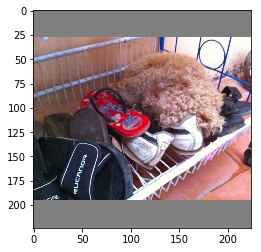

In [21]:
img = cv2.imread('val2014/COCO_val2014_000000000042.jpg')
img = preprocessing.resize_by_padding(img,224,224)
plt.imshow(img[0])

In [24]:
x = model.predict(np.array([img[0]]))

array([[[[nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         ...,
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan]],

        [[nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         ...,
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan]],

        [[nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         ...,
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan]],

        ...,

        [[nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan